In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import optimizers
#from keras import callbacks
#from losswise.libs import LosswiseKerasCallback
#import losswise
import numpy as np
import glob as glob

#losswise.set_api_key("9307ldi")

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 256, 256

train_data_dir = '../data/model/key17/train'
validation_data_dir = '../data/model/key17/validation'
nb_train_samples = int(len(glob.glob(train_data_dir+'/*/*.png')))
nb_validation_samples = int(len(glob.glob(validation_data_dir+'/*/*.png')))
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.5))

model.add(Conv2D(34, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(15, (8, 8)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

AdamOpt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=AdamOpt,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 34)        54434     
_________________________________________________________________
activation_2 (Activation)    (None, 80, 80, 34)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 34)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 34)        0         
__________

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 4828 images belonging to 6 classes.


In [6]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

Found 2070 images belonging to 6 classes.


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, verbose=1)

Epoch 1/50
301/301 [==============================] - 33s - loss: 1.5330 - acc: 0.3690 - val_loss: 1.1799 - val_acc: 0.5489
Epoch 2/50
301/301 [==============================] - 29s - loss: 1.0752 - acc: 0.5440 - val_loss: 0.8715 - val_acc: 0.6607
Epoch 3/50
301/301 [==============================] - 29s - loss: 0.8683 - acc: 0.6411 - val_loss: 0.6730 - val_acc: 0.7683
Epoch 4/50
301/301 [==============================] - 29s - loss: 0.7086 - acc: 0.7142 - val_loss: 0.6123 - val_acc: 0.7872
Epoch 5/50
301/301 [==============================] - 29s - loss: 0.5965 - acc: 0.7665 - val_loss: 0.4394 - val_acc: 0.8554
Epoch 6/50
301/301 [==============================] - 29s - loss: 0.5444 - acc: 0.7873 - val_loss: 0.3867 - val_acc: 0.8729
Epoch 7/50
301/301 [==============================] - 29s - loss: 0.4485 - acc: 0.8256 - val_loss: 0.3682 - val_acc: 0.8724
Epoch 8/50
301/301 [==============================] - 29s - loss: 0.4239 - acc: 0.8434 - val_loss: 0.3349 - val_acc: 0.8856
Epoch 9/

In [9]:
loss, accuracy = model.evaluate_generator(validation_generator, 
                                steps = nb_validation_samples // batch_size)
print()
print('Test Loss:', loss)
print('Test Accuracy', accuracy)


Test Loss: 0.118586220328
Test Accuracy 0.958130477118


In [10]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

valid_pred_prob = model.predict_generator(validation_generator,steps = nb_validation_samples // batch_size, verbose=1)
valid_pred_labels = np.argmax(valid_pred_prob, axis=-1)

Found 2070 images belonging to 6 classes.
129/129 [==============================] - 5s     


In [11]:
acc = 1-np.sum(valid_pred_labels!=validation_generator.classes[0:valid_pred_labels.shape[0]])/valid_pred_labels.shape[0]
acc

0.95784883720930236

In [12]:
model.save('../saved_weights/CNN_key17')

# Test data validation

In [13]:
test_data_dir = '../data/model/key17/test'
nb_test_samples = int(len(glob.glob(test_data_dir+'/*/*.png')))


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    shuffle = False,
    class_mode='categorical')

test_pred_prob = model.predict_generator(test_generator,steps = 50 // 1, verbose=1)
test_pred_labels = np.argmax(test_pred_prob, axis=-1)

Found 50 images belonging to 6 classes.
44/50 [=========================>....] - ETA: 0s

In [17]:
acc = 1-np.sum(test_pred_labels!=test_generator.classes)/nb_test_samples
acc

0.92000000000000004

In [22]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

pos1\17_16_18_22_24_19_L_L_L_L_H_L_0597_0_9963.png


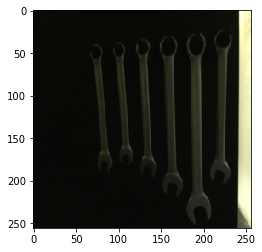

pos3\18_16_17_19_22_24_L_H_L_H_L_L_0563_0_7145.png


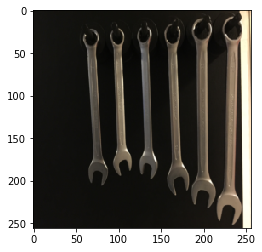

pos3\18_16_17_19_22_24_L_H_L_H_L_L_0567_0_3237.png


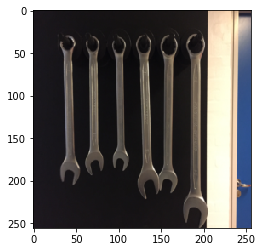

pos3\18_22_17_19_16_24_L_L_L_L_H_H_12_0_2437.png


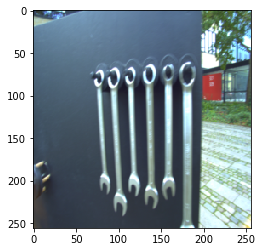

In [34]:
idx = np.array(np.where(test_pred_labels!=test_generator.classes))
for i in range(0,idx.shape[1]):
    print(test_generator.filenames[idx[0,i]])
    imgs=mpimg.imread(test_data_dir+'/'+test_generator.filenames[idx[0,i]])
    plt.figure()
    imgplot = plt.imshow(imgs)
    plt.show()